<a href="https://colab.research.google.com/github/rajat05jain/Python/blob/master/Analyzing%203%20Million%20Github%20Repos%20using%20BigQuery%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import auth
auth.authenticate_user()
print('authenticated')

authenticated


In [0]:
project_id='pythondata-232414'
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [18]:
myQUERY = """SELECT size
            FROM `bigquery-public-data.github_repos.contents`
            WHERE binary = True
            LIMIT 5000
        """
dry_run_config = bigquery.job.QueryJobConfig()
dry_run_config.dry_run = True
dry_run_job = client.query(myQUERY, job_config=dry_run_config)
print("This query will process ",dry_run_job.total_bytes_processed/ (1024*1024),"MB when run. ")

This query will process  2211.79439163208 MB when run. 


In [0]:
df=client.query(myQUERY).to_dataframe()

In [0]:
df1 = df.divide(2**20)

In [35]:
df1.describe()

,size
count,5000.000000
mean,0.183456
std,1.531204
min,0.000009
25%,0.001648
50%,0.007128
75%,0.040371
max,48.000122


In [0]:
import matplotlib.pyplot as plt

In [0]:
BYTES_PER_MB = 2**20
help(plt.figure)

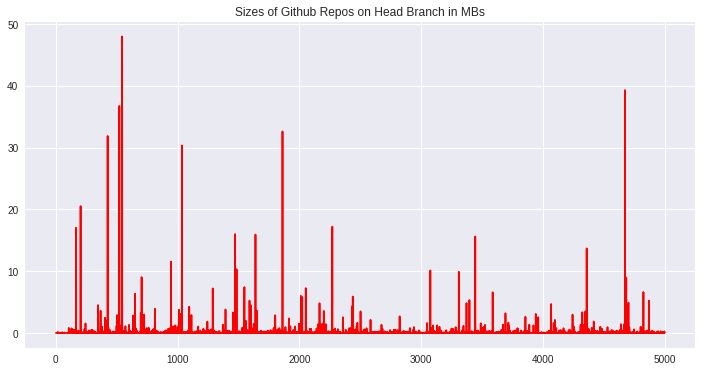

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df.divide(BYTES_PER_MB),color="red")
plt.savefig('github-sizes-on-head-branch.png')
plt.title("Sizes of Github Repos on Head Branch in MBs");

In [0]:
plt.close()

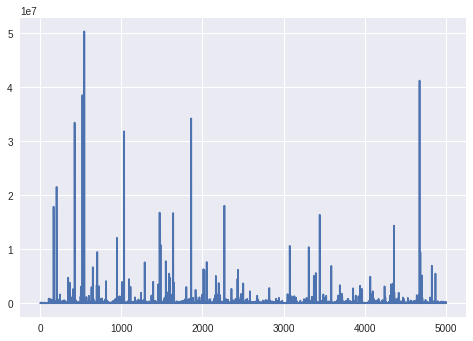

In [41]:
plt.plot(df)

In [0]:
df['b']=100

In [0]:
df['c']=200

<BarContainer object of 5000 artists>

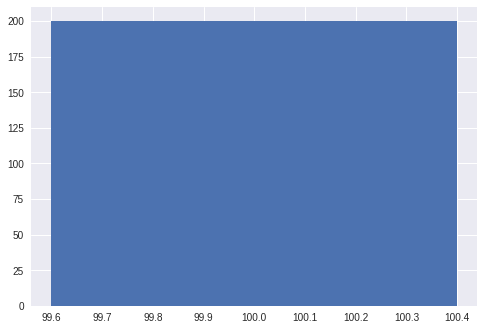

In [54]:
df['d']=random

In [0]:
query3= """SELECT language
            FROM `bigquery-public-data.github_repos.languages`
            LIMIT 5000
        """
df3 = client.query(query3).to_dataframe()

In [68]:
df3.head(10)

,language
0,"[{'name': 'C#', 'bytes': 655534}, {'name': 'GL..."
1,"[{'name': 'CSS', 'bytes': 804}, {'name': 'Java..."
2,"[{'name': 'CSS', 'bytes': 43474}, {'name': 'Co..."
3,"[{'name': 'C', 'bytes': 618}, {'name': 'Shell'..."
4,"[{'name': 'Arduino', 'bytes': 35338}, {'name':..."
5,"[{'name': 'C', 'bytes': 12024}, {'name': 'Java..."
6,"[{'name': 'ApacheConf', 'bytes': 3073}, {'name..."
7,"[{'name': 'Objective-C', 'bytes': 173663}, {'n..."
8,"[{'name': 'HTML', 'bytes': 26032}, {'name': 'J..."
9,"[{'name': 'C#', 'bytes': 52305}, {'name': 'CSS..."
